In [2]:
from Models.AEmodels import *

In [11]:
# -*- coding: utf-8 -*-
"""
Created on Wed Apr 10 16:14:32 2024

Example of Main Steps for the Detection of HPilory using AutoEncoders for
the detection of anomalous pathological staining

Guides: 
    1. Split into train and test steps 
    2. Save trainned models and any intermediate result input of the next step
    
@authors: debora gil, pau cano
email: debora@cvc.uab.es, pcano@cvc.uab.es
Reference: https://arxiv.org/abs/2309.16053 

"""
# IO Libraries
import sys
import os
import pickle

# Standard Libraries
import numpy as np
import pandas as pd
import glob

# Torch Libraries
from torch.utils.data import DataLoader
import gc
import torch
import torch.nn as nn
import torch.optim as optim
# import wandb



## Own Functions
from Models.AEmodels import AutoEncoderCNN
from Models.datasets import Standard_Dataset
from loadCropped import loadCropped


# wandb.login(key="8e9b2ed0a8b812e7888f16b3aa28491ba440d81a")

# wandb.init(project="PSIV 3", config={"batch_size":512}, dir="./wandb")



net_paramsEnc = {"drop_rate": 0}
net_paramsDec = {}
inputmodule_paramsDec = {}
def AEConfigs(Config):

    if Config=='1':
        # CONFIG1
        net_paramsEnc['block_configs']=[[32,32],[64,64]]
        net_paramsEnc['stride']=[[1,2],[1,2]]
        net_paramsDec['block_configs']=[[64,32],[32,inputmodule_paramsEnc['num_input_channels']]]
        net_paramsDec['stride']=net_paramsEnc['stride']
        net_paramsEnc["drop_rate"] = 0.2
        net_paramsDec["drop_rate"] = 0.2
        inputmodule_paramsDec['num_input_channels']=net_paramsEnc['block_configs'][-1][-1]



    elif Config=='2':
        # CONFIG 2
        net_paramsEnc['block_configs']=[[32],[64],[128],[256]]
        net_paramsEnc['stride']=[[2],[2],[2],[2]]
        net_paramsDec['block_configs']=[[128],[64],[32],[inputmodule_paramsEnc['num_input_channels']]]
        net_paramsDec['stride']=net_paramsEnc['stride']
        inputmodule_paramsDec['num_input_channels']=net_paramsEnc['block_configs'][-1][-1]


    elif Config=='3':
        # CONFIG3
        net_paramsEnc['block_configs']=[[32],[64],[64]]
        net_paramsEnc['stride']=[[1],[2],[2]]
        net_paramsDec['block_configs']=[[64],[32],[inputmodule_paramsEnc['num_input_channels']]]
        net_paramsDec['stride']=net_paramsEnc['stride']
        inputmodule_paramsDec['num_input_channels']=net_paramsEnc['block_configs'][-1][-1]

    return net_paramsEnc,net_paramsDec,inputmodule_paramsDec


######################### 0. EXPERIMENT PARAMETERS
# 0.1 AE PARAMETERS
inputmodule_paramsEnc={}
inputmodule_paramsEnc['num_input_channels']=3





# 1.2 Patches Data




#### 2. DATA SPLITING INTO INDEPENDENT SETS

# 2.0 Annotated set for FRed optimal threshold


# 2.1 AE trainnig set





# 2.1 Diagosis crossvalidation set

#### 3. lOAD PATCHES

### 4. AE TRAINING

# EXPERIMENTAL DESIGN:
# TRAIN ON AE PATIENTS AN AUTOENCODER, USE THE ANNOTATED PATIENTS TO SET THE
# THRESHOLD ON FRED, VALIDATE FRED FOR DIAGNOSIS ON A 10 FOLD SCHEME OF REMAINING
# CASES.

# 4.1 Data Split
print("CREANT MODEL")
###### CONFIG1
Config='1'
net_paramsEnc,net_paramsDec,inputmodule_paramsDec = AEConfigs(Config)
model=AutoEncoderCNN(inputmodule_paramsEnc, net_paramsEnc,
                     inputmodule_paramsDec, net_paramsDec)

CREANT MODEL


In [21]:
import torch
from torchvision import transforms
import cv2
import matplotlib.pyplot as plt

# Step 1: Load the pre-trained model
net_paramsEnc, net_paramsDec, inputmodule_paramsDec = AEConfigs(Config)
model = AutoEncoderCNN(inputmodule_paramsEnc, net_paramsEnc,
                       inputmodule_paramsDec, net_paramsDec)
model.load_state_dict(torch.load('model_SIMPLE.pth'))
model.eval()  # Set the model to evaluation mode


AutoEncoderCNN(
  (encoder): Encoder(
    (encoder): Sequential(
      (cnnblock1): _CNNBlock(
        (cnnlayer1): _CNNLayer(
          (cnn_layer): Sequential(
            (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): LeakyReLU(negative_slope=0.01, inplace=True)
            (3): Dropout(p=0.2, inplace=False)
          )
        )
        (cnnlayer2): _CNNLayer(
          (cnn_layer): Sequential(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): LeakyReLU(negative_slope=0.01, inplace=True)
            (3): Dropout(p=0.2, inplace=False)
          )
        )
      )
      (cnnblock2): _CNNBlock(
        (cnnlayer1): _CNNLayer(
          (cnn_layer): Sequential(
            (0): Conv2d(32, 64, kernel_size=(

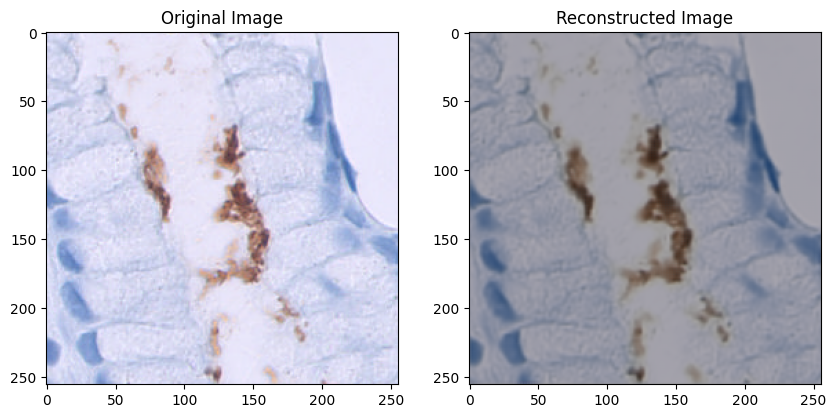

In [22]:
import torch
import cv2
import numpy as np
from torchvision import transforms
import matplotlib.pyplot as plt
from PIL import Image

# Step 1: Load and preprocess the input image
image_path = 'image_helico.png'
input_image = cv2.imread(image_path)  # Read the image
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)  # Convert to RGB format

# Convert the image to float32 and normalize to [0, 1]
input_image = input_image.astype(np.float32) / 255.0  

# Convert image to a PIL Image (needed for transforms)
input_image_pil = Image.fromarray((input_image * 255).astype(np.uint8))

# Define the transform (ToTensor will normalize the image)
transform = transforms.Compose([
    transforms.ToTensor()  # Converts image to tensor and scales it to [0, 1]
])

# Apply the transformations
input_tensor = transform(input_image_pil).unsqueeze(0)  # Add batch dimension

# Step 2: Load the model and pass the image through it
model.eval()  # Set model to evaluation mode
with torch.no_grad():  # No need to track gradients for inference
    output_tensor = model(input_tensor)

# Step 3: Postprocess the output (convert back to image format)
# Convert tensor to numpy and reverse the ToTensor() normalization
output_image = output_tensor.squeeze(0).detach().cpu().numpy()  # Remove batch dimension
output_image = np.transpose(output_image, (1, 2, 0))  # Convert to HWC format

# Step 4: Display the original and output images
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(input_image)
plt.title('Original Image')

# Reconstructed Image
plt.subplot(1, 2, 2)
plt.imshow(output_image)
plt.title('Reconstructed Image')

plt.show()


In [25]:
import torch
from torchvision import transforms
import cv2
import matplotlib.pyplot as plt

# Step 1: Load the pre-trained model
net_paramsEnc, net_paramsDec, inputmodule_paramsDec = AEConfigs(Config)
model = AutoEncoderCNN(inputmodule_paramsEnc, net_paramsEnc,
                       inputmodule_paramsDec, net_paramsDec)
model.load_state_dict(torch.load('model.pth'))
model.eval()  # Set the model to evaluation mode


AutoEncoderCNN(
  (encoder): Encoder(
    (encoder): Sequential(
      (cnnblock1): _CNNBlock(
        (cnnlayer1): _CNNLayer(
          (cnn_layer): Sequential(
            (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): LeakyReLU(negative_slope=0.01, inplace=True)
            (3): Dropout(p=0.2, inplace=False)
          )
        )
        (cnnlayer2): _CNNLayer(
          (cnn_layer): Sequential(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): LeakyReLU(negative_slope=0.01, inplace=True)
            (3): Dropout(p=0.2, inplace=False)
          )
        )
      )
      (cnnblock2): _CNNBlock(
        (cnnlayer1): _CNNLayer(
          (cnn_layer): Sequential(
            (0): Conv2d(32, 64, kernel_size=(

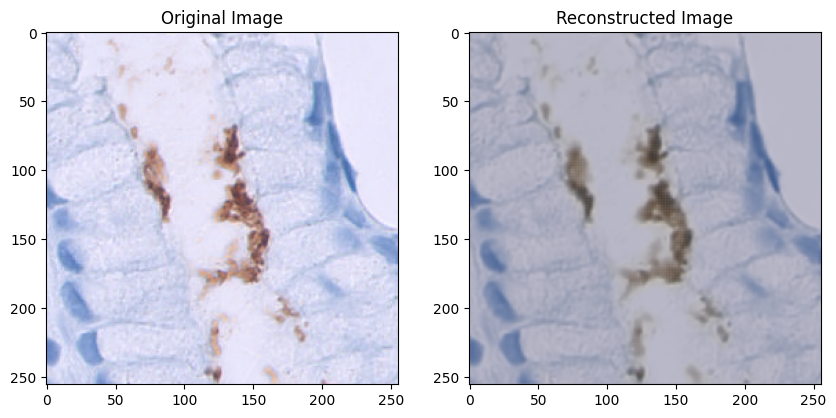

In [26]:
import torch
import cv2
import numpy as np
from torchvision import transforms
import matplotlib.pyplot as plt
from PIL import Image

# Step 1: Load and preprocess the input image
image_path = 'image_helico.png'
input_image = cv2.imread(image_path)  # Read the image
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)  # Convert to RGB format

# Convert the image to float32 and normalize to [0, 1]
input_image = input_image.astype(np.float32) / 255.0  

# Convert image to a PIL Image (needed for transforms)
input_image_pil = Image.fromarray((input_image * 255).astype(np.uint8))

# Define the transform (ToTensor will normalize the image)
transform = transforms.Compose([
    transforms.ToTensor()  # Converts image to tensor and scales it to [0, 1]
])

# Apply the transformations
input_tensor = transform(input_image_pil).unsqueeze(0)  # Add batch dimension

# Step 2: Load the model and pass the image through it
model.eval()  # Set model to evaluation mode
with torch.no_grad():  # No need to track gradients for inference
    output_tensor = model(input_tensor)

# Step 3: Postprocess the output (convert back to image format)
# Convert tensor to numpy and reverse the ToTensor() normalization
output_image = output_tensor.squeeze(0).detach().cpu().numpy()  # Remove batch dimension
output_image = np.transpose(output_image, (1, 2, 0))  # Convert to HWC format

# Step 4: Display the original and output images
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(input_image)
plt.title('Original Image')

# Reconstructed Image
plt.subplot(1, 2, 2)
plt.imshow(output_image)
plt.title('Reconstructed Image')

plt.show()
